 # Predicting the Probaility of a Customer Terminating Service at a Bank
 
 ### Introduciton
 
A bank has noticed an increase in its churn rates. A sample of 10,000 customers was taken with the information available to the bank. In this report, I will construct a logistic regression model using an Artificial Neural Network to find the probability of a customer terminating their service. This can be used to find customers with a churn probability greater than 50% and inform the bank to offer incentives for the customer to retain them.


## Data set and Visual Analysis

In [1]:
'''Importing the necessary packages'''
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
df = pd.read_csv(r"C:\Users\ovied\OneDrive\Desktop\Data Sets\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Here we can see that the data set has 14 columns but for our ANN model we will not include the columns 'RowNumber',	'CustomerId', 'Surname' because they will not provide any useful information to our prediction model.


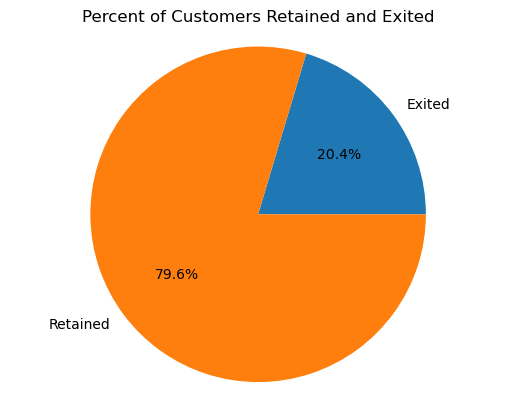

In [3]:
my_data = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
my_labels = 'Exited', 'Retained'
plt.pie(my_data, labels=my_labels, autopct='%1.1f%%')
plt.title('Percent of Customers Retained and Exited')
plt.axis('equal')
plt.show()

[Text(0.5, 1.0, 'Customer Churn by Gender')]

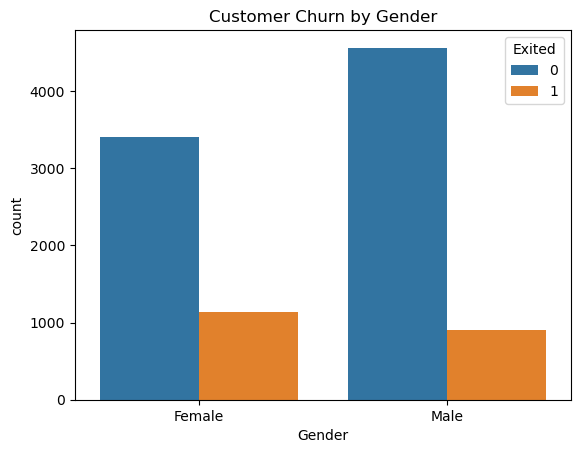

In [4]:
sns.countplot(data=df, x="Gender", hue="Exited").set(title='Customer Churn by Gender')

[Text(0.5, 1.0, 'Customer Churn by Number of Products')]

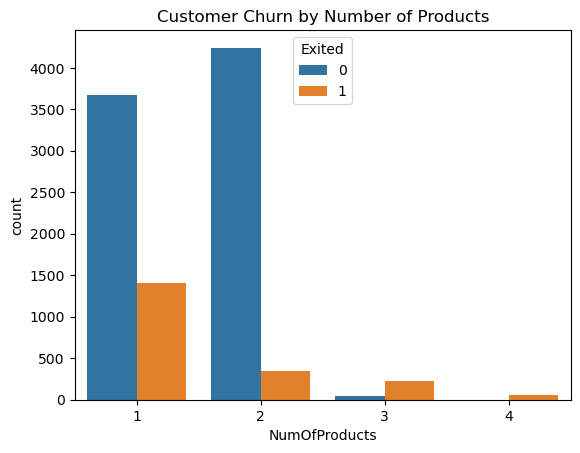

In [5]:
sns.countplot(data=df, x="NumOfProducts", hue="Exited").set(title='Customer Churn by Number of Products')

Looking at the pie chart, we can see that the bank has retained 79% of its customers while only 20.4% have discontinued their service. Also, looking at the count plots, we can see that the proportion of females discontinuing their service compared to males is greater. Lastly, customers with only one product from the bank have the highest proportion of discontinuing service, while customers with two or more products have a smaller proportion.

<AxesSubplot:>

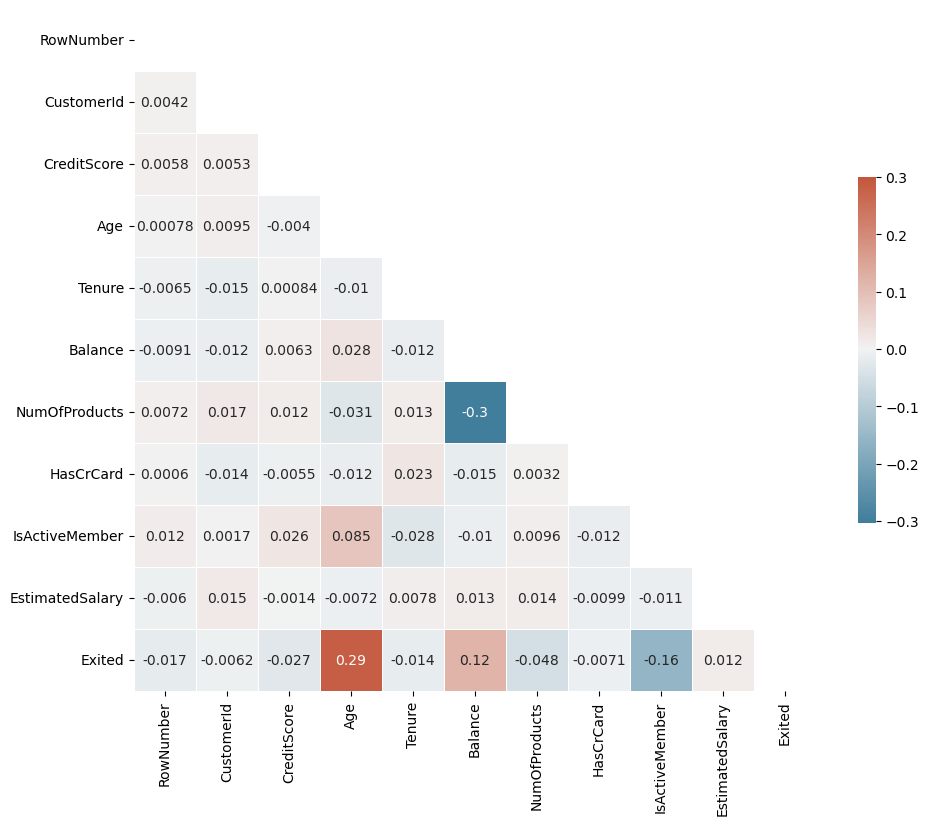

In [8]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True,mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Looking at the Correlation Matrix we can see that the Balance and Number of Products have a negative correlation value meaning that they have an inverse relation. Secondly the age and the Exited have the second highest correlation value.

## Processing and Encoding the Data

Since the model will not be using the first 3 columns the x values of the data will be obtained by simply selecting the columns after in the dataframe. 

In [10]:
x = df.iloc[:,3:-1].values  #takes all columns after the credit score expect for the exited val
y = df.iloc[:,-1].values  #takes the last column which is the Exited value
print(x[0])

[619 'France' 'Female' 42 2 0.0 1 1 1 101348.88]


In [11]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
x[:,2] = le.fit_transform(x[:,2])  #Changes the gender values to binary 
print(x[0])

[619 'France' 0 42 2 0.0 1 1 1 101348.88]


In [12]:
'''Transforms the multple geography categorical values into binary values'''

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')

x = np.array(ct.fit_transform(x))

In [13]:
print(x[:10])

[[1.0 0.0 0.0 619 0 42 2 0.0 1 1 1 101348.88]
 [0.0 0.0 1.0 608 0 41 1 83807.86 1 0 1 112542.58]
 [1.0 0.0 0.0 502 0 42 8 159660.8 3 1 0 113931.57]
 [1.0 0.0 0.0 699 0 39 1 0.0 2 0 0 93826.63]
 [0.0 0.0 1.0 850 0 43 2 125510.82 1 1 1 79084.1]
 [0.0 0.0 1.0 645 1 44 8 113755.78 2 1 0 149756.71]
 [1.0 0.0 0.0 822 1 50 7 0.0 2 1 1 10062.8]
 [0.0 1.0 0.0 376 0 29 4 115046.74 4 1 0 119346.88]
 [1.0 0.0 0.0 501 1 44 4 142051.07 2 0 1 74940.5]
 [1.0 0.0 0.0 684 1 27 2 134603.88 1 1 1 71725.73]]


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)  #splits the data to 80% in training and 20% in testing

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  #standardizes the data to improve the training of the ANN
X_test = sc.fit_transform(X_test)


In [16]:
ann = tf.keras.models.Sequential()  #creates the variable that represents the ANN

In [17]:
ann.add(tf.keras.layers.Dense(units= 6, activation= 'relu')) #adding the first hidden layer with the rectifier activation func.

In [18]:
ann.add(tf.keras.layers.Dense(units= 6, activation= 'relu')) #adding the second hidden layer with the rectifier activation func.

In [19]:
ann.add(tf.keras.layers.Dense(units= 1, activation= 'sigmoid')) #adding the output layer with the sigmoid activation func.
                                                                #to get the probabilites that the binary function is equal to 1

In [20]:
ann.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [21]:
ann.fit(X_train, y_train, batch_size= 32, epochs= 100)  #training the model

Epoch 1/100
250/250 [==============================] - 1s 607us/step - loss: 0.5561 - accuracy: 0.7611
Epoch 2/100
250/250 [==============================] - 0s 582us/step - loss: 0.4497 - accuracy: 0.7993
Epoch 3/100
250/250 [==============================] - 0s 595us/step - loss: 0.4234 - accuracy: 0.8085
Epoch 4/100
250/250 [==============================] - 0s 590us/step - loss: 0.4136 - accuracy: 0.8125
Epoch 5/100
250/250 [==============================] - 0s 574us/step - loss: 0.4073 - accuracy: 0.8158
Epoch 6/100
250/250 [==============================] - 0s 582us/step - loss: 0.4021 - accuracy: 0.8177
Epoch 7/100
250/250 [==============================] - 0s 574us/step - loss: 0.3966 - accuracy: 0.8229
Epoch 8/100
250/250 [==============================] - 0s 574us/step - loss: 0.3911 - accuracy: 0.8256
Epoch 9/100
250/250 [==============================] - 0s 570us/step - loss: 0.3858 - accuracy: 0.8251
Epoch 10/100
250/250 [==============================] - 0s 578us/step - l

250/250 [==============================] - 0s 619us/step - loss: 0.3260 - accuracy: 0.8626
Epoch 80/100
250/250 [==============================] - 0s 603us/step - loss: 0.3255 - accuracy: 0.8625
Epoch 81/100
250/250 [==============================] - 0s 615us/step - loss: 0.3258 - accuracy: 0.8633
Epoch 82/100
250/250 [==============================] - 0s 599us/step - loss: 0.3253 - accuracy: 0.8635
Epoch 83/100
250/250 [==============================] - 0s 586us/step - loss: 0.3258 - accuracy: 0.8621
Epoch 84/100
250/250 [==============================] - 0s 574us/step - loss: 0.3260 - accuracy: 0.8616
Epoch 85/100
250/250 [==============================] - 0s 570us/step - loss: 0.3261 - accuracy: 0.8641
Epoch 86/100
250/250 [==============================] - 0s 574us/step - loss: 0.3259 - accuracy: 0.8625
Epoch 87/100
250/250 [==============================] - 0s 574us/step - loss: 0.3252 - accuracy: 0.8641
Epoch 88/100
250/250 [==============================] - 0s 562us/step - loss:

In [22]:
y_pred = ann.predict(X_test)     #Using the test data set 
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 452us/step
[[0 0]
 [1 1]
 [0 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)  #makes a confusion matrix of the predicted and actual values 
print(cm) 
accuracy_score(y_test, y_pred)

[[1527   58]
 [ 219  196]]


0.8615

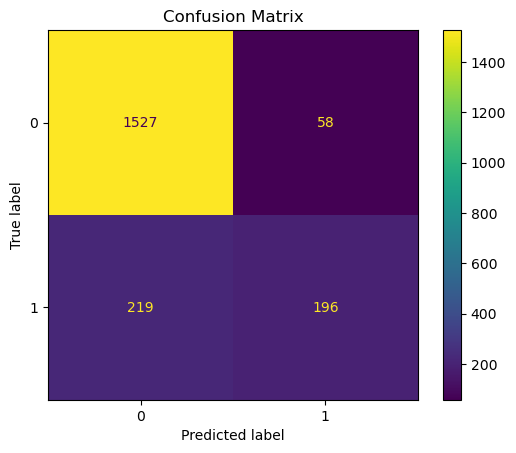

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)  #makes a plot of the confusion matrix
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [54]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5) #test of a random prediction

1/1 [==============================] - 0s 12ms/step
[[False]]


In [58]:
from platform import python_version

print(python_version())

3.9.13
